In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Let's discuss some points aput our dataset before working on it.

We are haing 15 different columns in our dataset in which there are several factors which are affecting the income of person and we can say our target variable is a having Boolean value which makes this model as classification model and we need to make some changes in columns for the prediction which we'll do further.

Also we can see that we are having too many columns as object datatype including our target variable so it also needs to be changed for prediction.

Let's see further what more observation we can do via EDA and then will go further for prediction after removing outliers and skewness.

Let's get some insight and clean our data to proceed further.

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


With the above we can see first 5 rows of our dataset, by which we can see that which factor is affecting income of a person.

In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Here we can see last 5 rows of our dataset which shows the same thing as top 5 that is factors affecting income of a person. 

In [5]:
df.shape

(32560, 15)

By the above function we can see that we are having 32560 rows and 15 columns  in our dataset.

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analys.

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Here we can see that we have 2 different types of data in our data set, that is int and object we'll see further if column having object is important for us and if it is important we'll change it into numeric type to fit them in our model.

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can see we are having 0 null values in our dataset as it is clean dataset, which will be beneficial for us to proceed further.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can also see null values and datatypes by above code.

<Axes: >

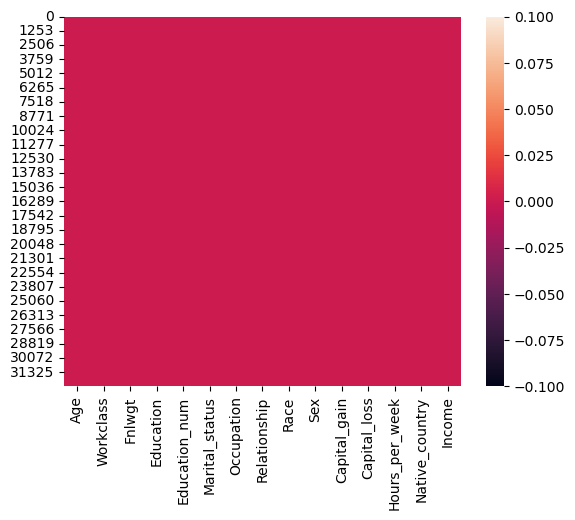

In [10]:
#Let's make a heatmap to analys null values.
sns.heatmap(df.isnull())

We can see that our graph is having maximum colour near to 0 this means we do not have any null value in our dataset, and it's ready to work with after checking outliers and skewness.

In [11]:
df.nunique().to_frame("Unique values")

,Unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


We can see we are having maximum unique values in numeric column which will be helpful in analysing data.

In [12]:
df.duplicated().sum()

24

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

In [15]:
duplicates = df[df.duplicated()]
print(duplicates)

       Age          Workclass  Fnlwgt      Education  Education_num  \
4880    25            Private  308144      Bachelors             13   
5103    90            Private   52386   Some-college             10   
9170    21            Private  250051   Some-college             10   
11630   20            Private  107658   Some-college             10   
13083   25            Private  195994        1st-4th              2   
15058   21            Private  243368      Preschool              1   
17039   46            Private  173243        HS-grad              9   
18554   30            Private  144593        HS-grad              9   
18697   19            Private   97261        HS-grad              9   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
21874   49            Private   31267        7th-8th              4   
22299   25            Private  195994        1st-4th              2   
22366 

As we can see we are not having exactly duplicated values we have to keep them as it will affect our prediction.

Let's also change object columns into integer before proceeding further.

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [4]:
df['Workclass'] = label_encoder.fit_transform(df['Workclass'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_status'] = label_encoder.fit_transform(df['Marital_status'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Relationship'] = label_encoder.fit_transform(df['Relationship'])
df['Race'] = label_encoder.fit_transform(df['Race'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Native_country'] = label_encoder.fit_transform(df['Native_country'])

In [5]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


Following is the complete analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

Here are some observation as per above details.

We can see that the count of all columns are same it means our data is perfect and ready to work with.

We can see that there is  difference in mean and median of most of the column this means our data is skewed like capital gain, capital loss income and Fnlwgt are having mean greater than their median which means they are right skewed and we'll have to treat them which we'll do further.

Also Native Country and Race are having their median greater than their mean which means they are left skewed and we'll have to treat them which we'll do further.

By analysing the data we can see that there is difference between 75th percentile and maximum value this means we are having outliers in our dataset, ans will treat it further.

In [84]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [22]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125


By the above fubnction we can analys that our data is not corelated too much with each other which means we do not have to face multicollenearity issue

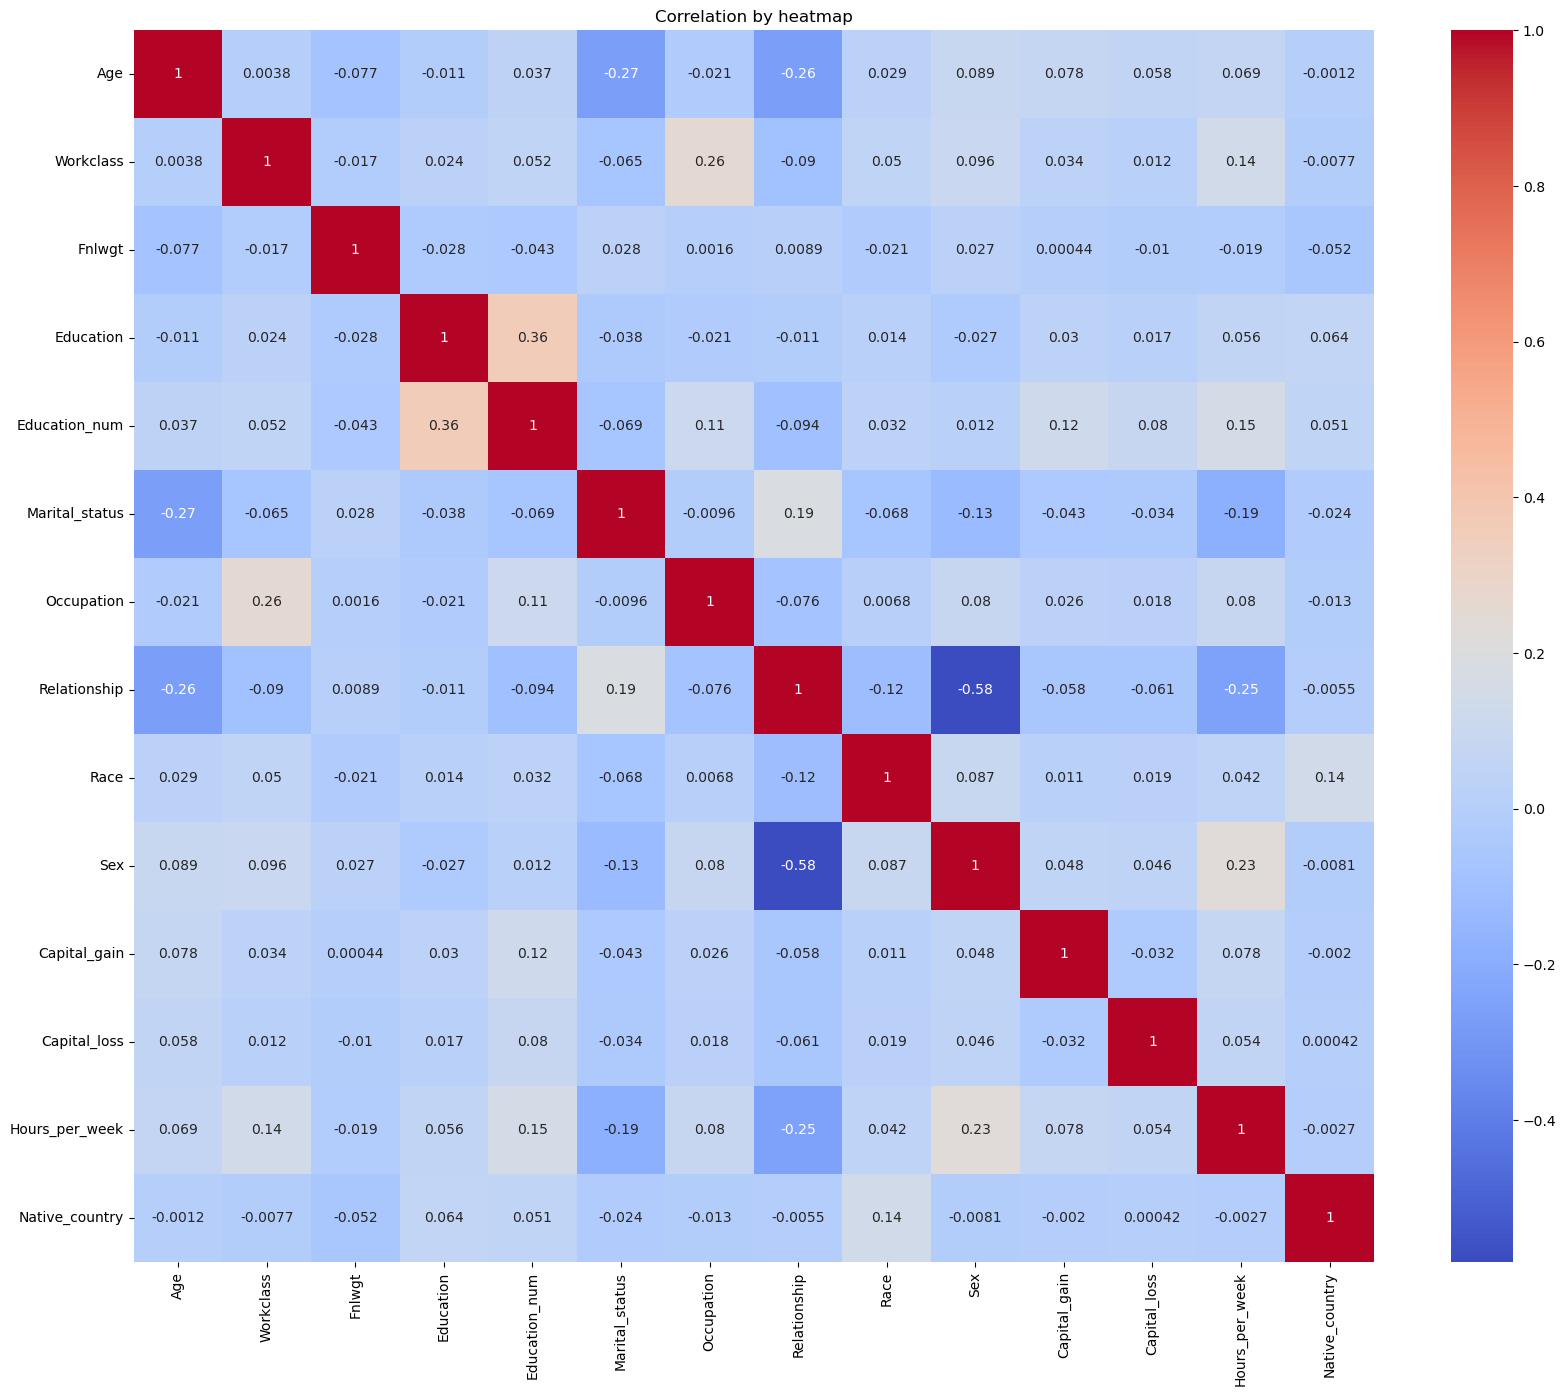

In [24]:
# let's also check corrrelation with the help of heatmap
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

we can see most of the boxes in blue box that means the data us not having multicollenearity issue.

Let's also make some changes in our target variable as currently it is acting as an object.

In [6]:
df['Income'] = df['Income'].apply(lambda x: 1 if '>' in x else 0)

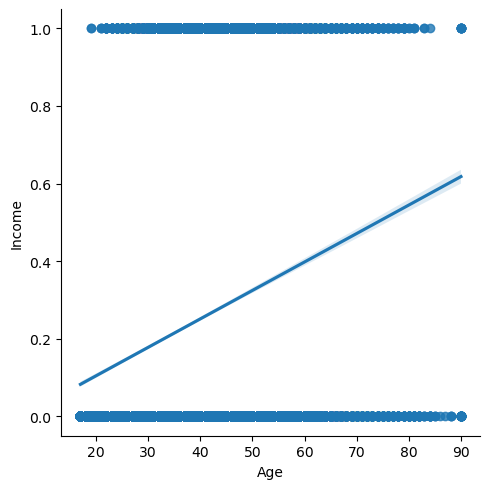

In [7]:
sns.lmplot(x='Age',y='Income',data=df,palette='colorblind')

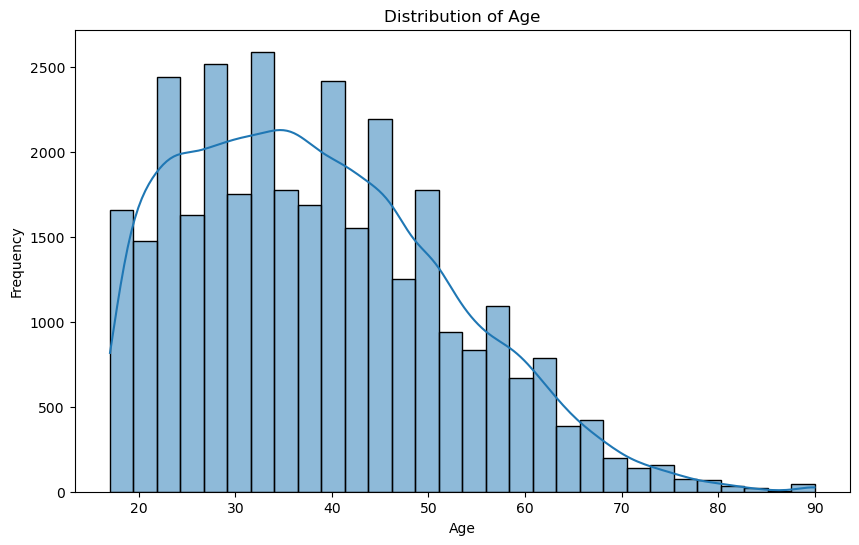

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

With the help of above greaph we can see that our data is having maximum number person between 20-50 year old.

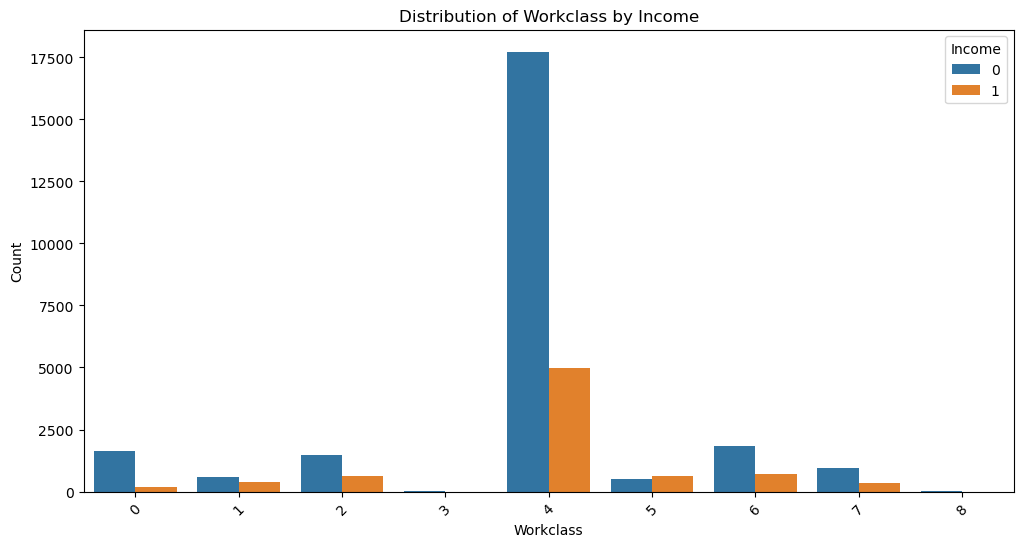

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Workclass', data=df, hue='Income')
plt.title('Distribution of Workclass by Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here we can see distribution according to workclass it is not getting clear because we've already changed our object datatype to int, however by this we can atleast observe that there is too much variance between workclasses.

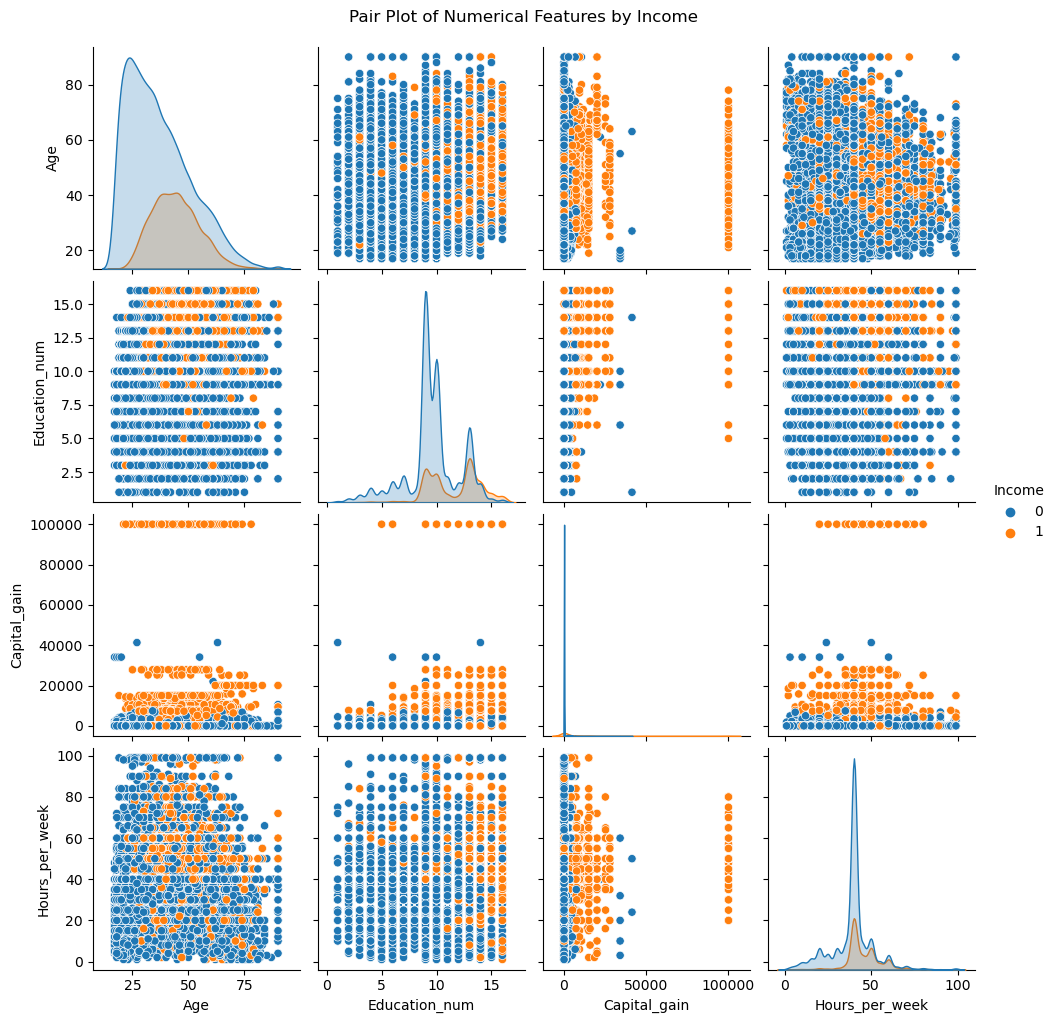

In [50]:
sns.pairplot(df[['Age', 'Education_num', 'Capital_gain', 'Hours_per_week', 'Income']], hue='Income')
plt.suptitle('Pair Plot of Numerical Features by Income', y=1.02)
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'Workclass'),
  Text(3, 0, 'Fnlwgt'),
  Text(4, 0, 'Education'),
  Text(5, 0, 'Education_num'),
  Text(6, 0, 'Marital_status'),
  Text(7, 0, 'Occupation'),
  Text(8, 0, 'Relationship'),
  Text(9, 0, 'Race'),
  Text(10, 0, 'Sex'),
  Text(11, 0, 'Capital_gain'),
  Text(12, 0, 'Capital_loss'),
  Text(13, 0, 'Hours_per_week'),
  Text(14, 0, 'Native_country'),
  Text(15, 0, 'Income')])

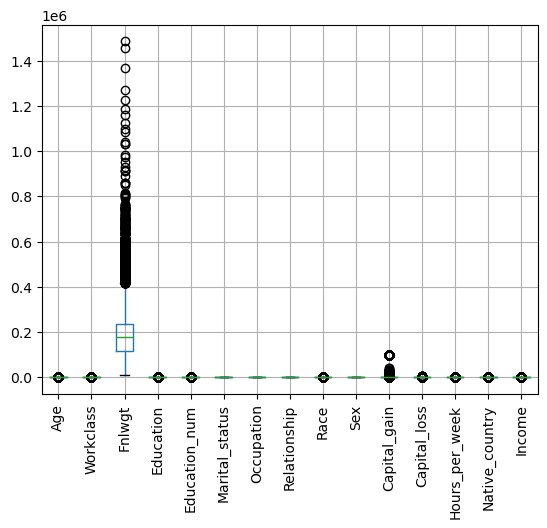

In [8]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks(rotation=90)

With the help of above boxplot we can see that we are having outliers in Fnlwgt, capital_gain and capital loss column which we've already observed in above describe function which we'll treat further.

In [20]:
#Let's find outlier with Zscore method
outliers=df[['Fnlwgt','Capital_gain','Capital_loss']]
z=np.abs(zscore(outliers))
z

,Fnlwgt,Capital_gain,Capital_loss
0,1.008742,0.145914,0.216663
1,0.245046,0.145914,0.216663
2,0.425770,0.145914,0.216663
3,1.408146,0.145914,0.216663
4,0.898170,0.145914,0.216663
...,...,...,...
32555,0.639710,0.145914,0.216663
32556,0.335466,0.145914,0.216663
32557,0.358811,0.145914,0.216663
32558,0.110927,0.145914,0.216663


In [21]:
np.where(z>3)

(array([   22,    31,    36, ..., 32457, 32510, 32517], dtype=int64),
 array([2, 2, 0, ..., 2, 0, 1], dtype=int64))

In [22]:
df1=df[(z<3).all(axis=1)]

And it's done we've successfully removed outliers from the data and it's ready to work with now.

In [23]:
df1.shape

(30540, 15)

we can see earlier we were having 891 rows however after rwemoving outliers we are only having 30540 rows that means we have successfuly removed outliers without too much dataloss.

In [24]:
df1.skew()

Age                0.573867
Workclass         -0.754534
Fnlwgt             0.631510
Education         -0.926816
Education_num     -0.322659
Marital_status    -0.035783
Occupation         0.118946
Relationship       0.754351
Race              -2.437529
Sex               -0.689243
Capital_gain       4.957644
Capital_loss      29.839094
Hours_per_week     0.224673
Native_country    -3.669205
Income             1.336068
dtype: float64

We can see that capital loss column is too much skewed and it is better o to remove this column after which we'll treat other columns.

In [25]:
df1=df1.drop('Capital_loss',axis=1)

In [26]:
#Let's use cuberot methos to remove Skewness
df1['Capital_gain']=np.cbrt(df1['Capital_gain'])

In [27]:
df1.skew()

Age               0.573867
Workclass        -0.754534
Fnlwgt            0.631510
Education        -0.926816
Education_num    -0.322659
Marital_status   -0.035783
Occupation        0.118946
Relationship      0.754351
Race             -2.437529
Sex              -0.689243
Capital_gain      3.379890
Hours_per_week    0.224673
Native_country   -3.669205
Income            1.336068
dtype: float64

In [28]:
df1['Native_country']=np.sqrt(df1['Native_country'])
df1['Race']=np.sqrt(df1['Race'])

In [29]:
df1.skew()

Age               0.573867
Workclass        -0.754534
Fnlwgt            0.631510
Education        -0.926816
Education_num    -0.322659
Marital_status   -0.035783
Occupation        0.118946
Relationship      0.754351
Race             -3.483362
Sex              -0.689243
Capital_gain      3.379890
Hours_per_week    0.224673
Native_country   -4.450934
Income            1.336068
dtype: float64

Let's remove race and capital gain and native contry columns as they are too much skewed.

In [34]:
df1.drop(columns=["Native_country","Capital_gain","Race"], inplace=True)

In [36]:
# As now our data is ready to work let's divide it into dependent and target variable.
features = ['Age', 'Workclass','Fnlwgt', 'Education','Education_num', 'Marital_status','Occupation','Relationship','Sex','Hours_per_week']
target = 'Income'

In [37]:
x = df1[features]
y = df1[target]

In [38]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (30540, 10)
dimension of dependent variable: (30540,)


We can see that we are having same number of rows that is 30540 and 10 columns in independent variable wich means we are going good and can perform tarining and prediction.

In [40]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = 42)

In [41]:
#let's import neccesarry libraries

from sklearn.metrics import classification_report, confusion_matrix,roc_curve, accuracy_score

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict (x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8300589390962672
[[6508  656]
 [ 901 1097]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7164
           1       0.63      0.55      0.58      1998

    accuracy                           0.83      9162
   macro avg       0.75      0.73      0.74      9162
weighted avg       0.82      0.83      0.83      9162



In [43]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict (x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.8220912464527396
[[6430  734]
 [ 896 1102]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7164
           1       0.60      0.55      0.57      1998

    accuracy                           0.82      9162
   macro avg       0.74      0.72      0.73      9162
weighted avg       0.82      0.82      0.82      9162



In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict (x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8469766426544423
[[6660  504]
 [ 898 1100]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7164
           1       0.69      0.55      0.61      1998

    accuracy                           0.85      9162
   macro avg       0.78      0.74      0.76      9162
weighted avg       0.84      0.85      0.84      9162



In [45]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict (x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.84042785418031
[[6629  535]
 [ 927 1071]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7164
           1       0.67      0.54      0.59      1998

    accuracy                           0.84      9162
   macro avg       0.77      0.73      0.75      9162
weighted avg       0.83      0.84      0.83      9162



In [46]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict (x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.8168522156734338
[[6501  663]
 [1015  983]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7164
           1       0.60      0.49      0.54      1998

    accuracy                           0.82      9162
   macro avg       0.73      0.70      0.71      9162
weighted avg       0.81      0.82      0.81      9162



Let's check best performing model via cross validation method.

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predrfc)-score.mean()*100))

[0.82400131 0.83120498 0.8321873  0.83546169 0.83087754]
0.8307465618860512
Difference between Accuracy score and cross validation score is : -82.24459724950886


In [49]:
score = cross_val_score(etc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predetc)-score.mean()*100))

[0.82105435 0.82138179 0.82629339 0.82645711 0.82547479]
0.8241322855271775
Difference between Accuracy score and cross validation score is : -81.59113730626501


In [50]:
score = cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predgbc)-score.mean()*100))

[0.83791749 0.84102816 0.84675835 0.85412574 0.84413883]
0.8447937131630647
Difference between Accuracy score and cross validation score is : -83.63239467365203


In [51]:
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predabc)-score.mean()*100))

[0.83529797 0.83611657 0.84413883 0.85003274 0.84266536]
0.8416502946954815
Difference between Accuracy score and cross validation score is : -83.32460161536784


In [52]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is :", (accuracy_score(y_test,predbc)-score.mean()*100))

[0.81597904 0.81827112 0.82465619 0.82301899 0.81941716]
0.8202685003274393
Difference between Accuracy score and cross validation score is : -81.20999781707049


We can see that Gradient boosting classifier is our best model as it is having least difference between actual and cross validation's accuracy

Let's do Hyper parameter tunning by Randomsearch¶

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [72]:
parameters={'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4)}

In [73]:
RSCV=RandomizedSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [74]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AFBAEA2510>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFAA1B4F50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFBAE8A8D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFBAEB3750>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AFBAEA0E10>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AFBAE8A710>})

In [75]:
RSCV.best_params_

{'learning_rate': 0.10197242893170469,
 'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 14,
 'n_estimators': 166,
 'subsample': 0.8501601046480487}

In [78]:
Model=GradientBoostingClassifier(learning_rate= 0.10197242893170469, max_depth=  5, min_samples_leaf= 7, min_samples_split= 14, n_estimators =166, subsample= 0.8501601046480487)

In [79]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8449028596376337
[[6585  579]
 [ 842 1156]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7164
           1       0.67      0.58      0.62      1998

    accuracy                           0.84      9162
   macro avg       0.78      0.75      0.76      9162
weighted avg       0.84      0.84      0.84      9162



We can see that at the final stage ur model is giving accuracy score of 84 which can be considered as excellent accuracy score.

Now let's save our model by pickle method

In [80]:
import pickle
filename='Census_income.pkl'
pickle.dump(Model,open(filename,'wb'))

In [81]:
Load_model=pickle.load(open('Census_income.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

84.49028596376337


In [82]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [83]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,9152,9153,9154,9155,9156,9157,9158,9159,9160,9161
Predicted,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
Original,1,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1


# Thank you